<a href="https://colab.research.google.com/github/anirudhreddy02/fastai_my_implementations/blob/master/sgd_linear_reg_optimzation_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install "torch==1.4" "torchvision==0.5.0"
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [0]:
from fastai.basics import *
 

In [0]:
n =100
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[0:5],x.ndim,x.is_cuda

(tensor([[-0.8612,  1.0000],
         [-0.6018,  1.0000],
         [-0.8510,  1.0000],
         [ 0.8154,  1.0000],
         [ 0.5447,  1.0000]]), 2, False)

In [0]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

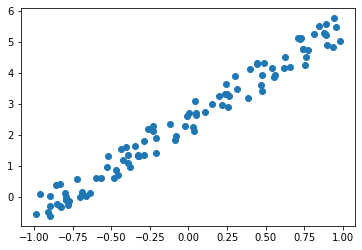

In [0]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat-y)**2).mean()

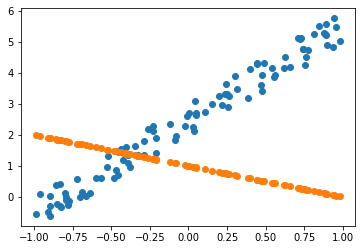

In [0]:
a = tensor(-1.0,1)
y_hat = x@a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)


In [0]:
mse(y_hat,y)

tensor(8.1632)

In [0]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat,y)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
     a.sub_(lr * a.grad)
     a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(8.1632, grad_fn=<MeanBackward0>)
tensor(1.2687, grad_fn=<MeanBackward0>)
tensor(0.3570, grad_fn=<MeanBackward0>)
tensor(0.1531, grad_fn=<MeanBackward0>)
tensor(0.1069, grad_fn=<MeanBackward0>)
tensor(0.0965, grad_fn=<MeanBackward0>)
tensor(0.0941, grad_fn=<MeanBackward0>)
tensor(0.0936, grad_fn=<MeanBackward0>)
tensor(0.0934, grad_fn=<MeanBackward0>)
tensor(0.0934, grad_fn=<MeanBackward0>)


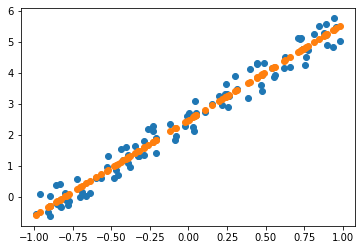

In [0]:
plt.scatter(x[:,0],y)
with torch.no_grad():
  plt.scatter(x[:,0],x@a)

In [0]:
a

Parameter containing:
tensor([3.0815, 2.4837], requires_grad=True)